<a href="https://colab.research.google.com/github/marcosfelt/interview_study_plan/blob/main/algorithms/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear and Logistic Regression

Implementing linear regression and logistic regression.

In [51]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Ordinary least squares

In [82]:
# Parameters
seed = 100
n = 100
test_size = 0.2

# Generate some data
d = 2
rng = np.random.default_rng(seed)
X = rng.random(size=(n, d))
y = 3*X[:, 0] - 0.1*X[:, 1] + 4 +  0.1 * rng.normal(size=(n))
cutoff =  int(test_size * n)
idx = np.arange(n)
train_idx, test_idx = idx[: cutoff], idx[cutoff:
                                         ]

## Linear algebra method

The model:

$y_i = \sum_{j=1}^m\beta_jx_j^i$

where $\beta_i \forall i=1\dots m$ are the coefficients and $m$ is th number of features. $y$ is the output. Let $\overrightarrow\beta$ be the vector of all coefficients.

We'd like to find the coefficients that minimize the following least squares objective:

$\overrightarrow\beta = \min \sum_{i=1}^n (y- \hat y)^2$

If you expand and take the derivative, you can arrive at:

$\overrightarrow\beta = (X^T X)^{-1}X^Ty$

In [86]:
# Normalize variables
X_mu_tr, X_std_tr = X[train_idx].mean(axis=0),X[train_idx].std(axis=0)
y_mu_tr, y_std_tr = y[train_idx].mean(), y[train_idx].std()
X_s_tr = (X[train_idx]-X_mu_tr)/X_std_tr
y_s_tr = (y[train_idx]-y_mu_tr)/y_std_tr
X_s_ts = (X[test_idx]-X_mu_tr)/X_std_tr
y_s_ts = (y[test_idx]-y_mu_tr)/y_std_tr

# Least squares
beta = np.linalg.inv(X_s_tr.T@X_s_tr)@X_s_tr.T@y_s_tr
print("Coefficients:", beta)

Coefficients: [ 0.99839248 -0.02647705]


Text(0.5, 1.0, 'Test Predictions')

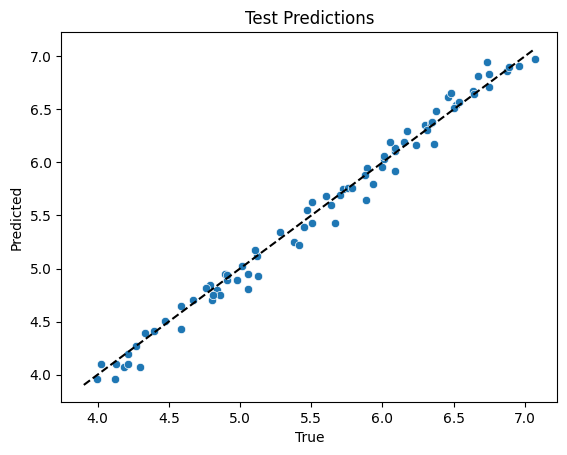

In [89]:
# Test predictions
y_hat = (X_s_ts@beta * y_std_tr) + y_mu_tr
ax = sns.scatterplot(x=y[test_idx], y=y_hat)
min_y = min(y.min(), y_hat.min())
max_y = max(y.max(), y_hat.max())
ax.plot([min_y, max_y], [min_y, max_y], 'k--')
ax.set_xlabel("True")
ax.set_ylabel("Predicted")
ax.set_title("Test Predictions")

In [97]:
# Coefficient of determination (how much of variance in output explained by input)
y_ts = y[test_idx]
ss_reg = ((y_ts - y_hat)**2).sum()
ss_total = ((y_ts - y_ts.mean())**2).sum()
r2 = 1 - ss_reg/ss_total
print(f"R2={r2:.02f}")

R2=0.99


##